In [1]:
import torch
from nfmc.sampling import nf_ula
from potentials.synthetic.shell import DoubleGammaShell

In [2]:
torch.manual_seed(0)

target = DoubleGammaShell()
samples = nf_ula(target, "realnvp", inv_mass_diag=target.variance.sqrt(), step_size=10.0)

NF-LMC (100 chains, 50 MCMC iterations per jump, adjusted jumps): 100%|██████████| 100/100 [00:26<00:00,  3.77it/s, current accepted jump fraction: 0.330, total accepted jump fraction: 0.387, ]


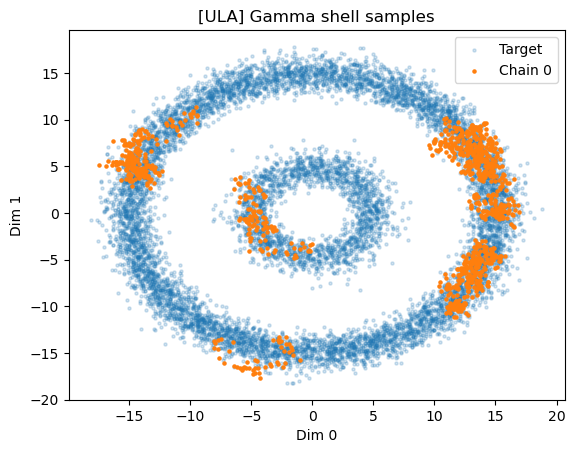

In [3]:
import matplotlib.pyplot as plt

chain_id = 0
target_samples = target.sample((10000,))

# Single chain
plt.figure()
plt.scatter(
    target_samples[:, 0],
    target_samples[:, 1],
    label='Target',
    alpha=0.2,
    s=5
)
plt.scatter(
    samples[-1000:, chain_id, 0],
    samples[-1000:, chain_id, 1],
    label=f'Chain {chain_id}',
    s=5
)
plt.xlabel("Dim 0")
plt.ylabel("Dim 1")
plt.title("[ULA] Gamma shell samples")
plt.legend()
plt.show()

In [4]:
import numpy as np


def add_contour(ax, resolution: int = 1500, n_levels: int = 10):
    u_helper = DoubleGammaShell()

    xs = torch.linspace(-22, 22, resolution)
    ys = torch.linspace(-22, 22, resolution)
    xx, yy = torch.meshgrid(xs, ys, indexing="xy")
    xx_flat, yy_flat = xx.ravel(), yy.ravel()
    zz_flat = -u_helper(torch.concat([xx_flat[:, None], yy_flat[:, None]], dim=1))
    zz_flat = zz_flat.exp()
    zz = zz_flat.view_as(xx)

    min_level = zz.min()
    max_level = zz.max()

    ax.contour(
        xx.numpy(),
        yy.numpy(),
        zz.numpy(),
        levels=np.linspace(min_level, max_level, n_levels),
        linewidths=1
    )

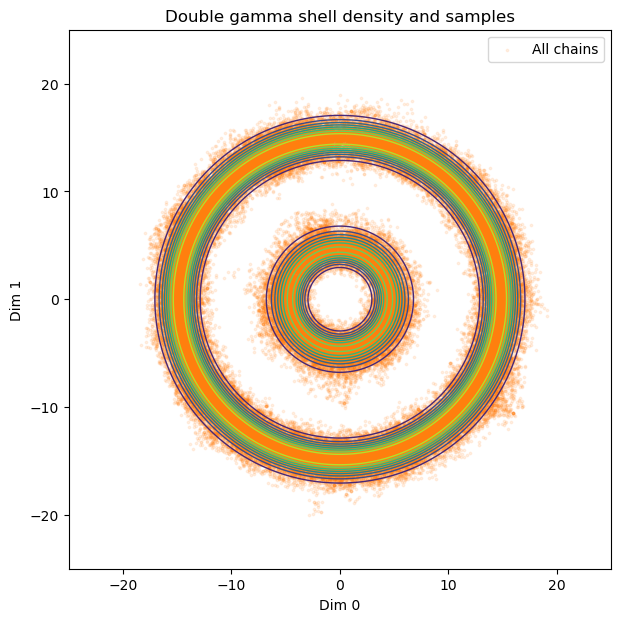

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
add_contour(ax)
plt.scatter(
    samples[-1500:, :, 0].ravel(),
    samples[-1500:, :, 1].ravel(),
    s=3,
    alpha=0.1,
    c='tab:orange',
    label='All chains'
)
ax.set_title("Double gamma shell density and samples")
ax.set_xlabel("Dim 0")
ax.set_ylabel("Dim 1")
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.legend()
plt.show()

In [6]:
samples.shape

torch.Size([5000, 100, 2])

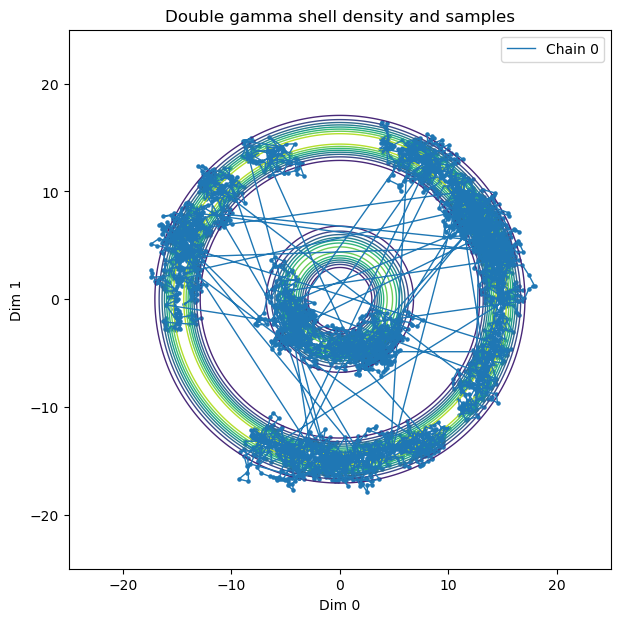

In [7]:
chain_id = 0

fig, ax = plt.subplots(figsize=(7, 7))
add_contour(ax)
plt.plot(
    samples[:, chain_id, 0].ravel(),
    samples[:, chain_id, 1].ravel(),
    label=f'Chain {chain_id}',
    c="tab:blue",
    linewidth=1
)
plt.scatter(
    samples[:, chain_id, 0].ravel(),
    samples[:, chain_id, 1].ravel(),
    c="tab:blue",
    s=5
)
ax.set_title("Double gamma shell density and samples")
ax.set_xlabel("Dim 0")
ax.set_ylabel("Dim 1")
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.legend()
plt.show()